In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [78]:
df = pd.read_csv('../twitter_fsa/data/train.csv')
df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [37]:
label_mapping = {
    0: "Negative", #"Bearish", 
    1: "Positive", # "Bullish", 
    2: "Neutral", #"Neutral"
}

Neutral, 6178, 64.7%
Positive, 1923, 20.2%
Negative, 1442, 15.1%


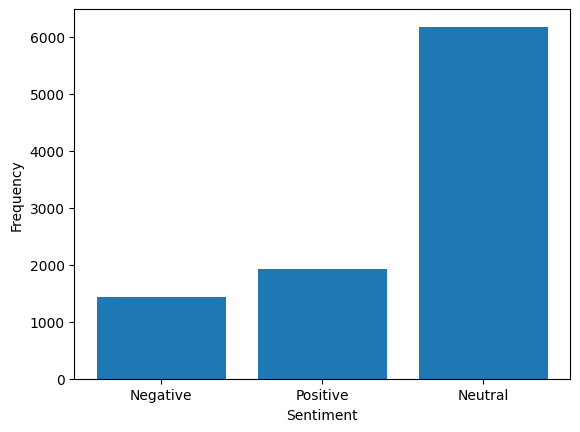

In [4]:
distribution = df["label"].value_counts()
for label, count in distribution.items():
    print(f"{label_mapping[label]}, {count}, {count/len(df) * 100:.1f}%")
plt.bar(distribution.index, distribution.values)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks([0,1,2], label_mapping.values())
plt.show()

In [5]:
val_df = pd.read_csv('../twitter_fsa/data/validation.csv')
distribution = val_df["label"].value_counts()
for label, count in distribution.items():
    print(f"{label_mapping[label]}, {count}, {count/len(val_df) * 100:.1f}%")

Neutral, 1252, 65.5%
Positive, 380, 19.9%
Negative, 278, 14.6%


In [79]:
df["word_count"] = df["text"].apply(lambda x: len(x.split(" ")))
df["word_count"].describe()

count    9543.000000
mean       12.168081
std         4.651245
min         1.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        31.000000
Name: word_count, dtype: float64

In [80]:
df["char_count"] = df["text"].apply(lambda x: len(x))
df["char_count"].describe()

count    9543.000000
mean       85.816934
std        35.097229
min         2.000000
25%        58.000000
50%        79.000000
75%       120.000000
max       190.000000
Name: char_count, dtype: float64

<Axes: title={'center': 'word_count'}, xlabel='label'>

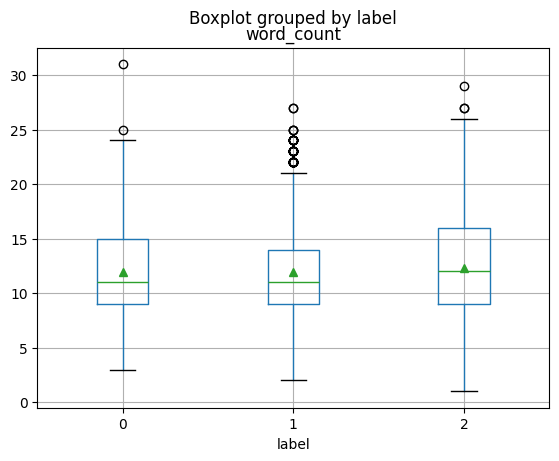

In [8]:
df.boxplot(column="word_count", by="label", showfliers=True, showmeans=True)

In [12]:
def get_short_review(num_words = 5):
    short_reviews = df.loc[df["word_count"] < num_words]
    return short_reviews

In [13]:
short_reviews = get_short_review()
print(f"Number of Short reviews: {len(short_reviews)}")
short_reviews

Number of Short reviews: 202


,text,label,word_count,char_count
110,Sirius downgraded on valuation,0,4,30
148,$NBY Rated buy https://t.co/xWbLXU1yOY,1,4,38
524,ECB keeps rates unchanged,2,4,25
966,Dana extends buyback program,1,4,28
1039,Twitter's First Billion-Dollar Quarter,1,4,38
...,...,...,...,...
8867,took $PLAY #4,2,3,13
8878,WBK,2,1,3
9257,$WORX new highs,1,3,15
9329,Evoke Pharma up 32%,1,4,19


In [55]:
tweets_with_links = df[df["text"].str.contains("https:")]
print(f" Tweets with links {len(tweets_with_links)} === {(len(tweets_with_links)/len(df))*100:.1f}%")

 Tweets with links 4470 === 46.8%


In [42]:
tweets_with_links.head()

,text,label,word_count,char_count
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10,77
1,$CCL $RCL - Nomura points to bookings weakness...,0,14,102
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14,94
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7,59
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10,71


In [43]:
df["is_url_present"] = df["text"].str.contains("https:")

<Figure size 1000x600 with 0 Axes>

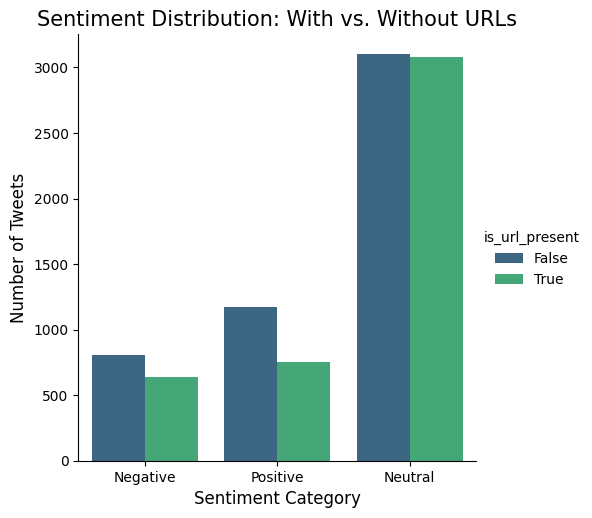

In [48]:
import seaborn as sns
df['sentiment_name'] = df['label'].map(label_mapping)

# 2. Create the grouped count plot
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='sentiment_name', hue='is_url_present', palette='viridis', kind='count')

plt.title('Sentiment Distribution: With vs. Without URLs', fontsize=15)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.show()

In [52]:
def show_distribution(sentiment=0):
    total = df[df["label"] == sentiment]
    with_url = df[(df["label"] == sentiment) & (df["is_url_present"] == 0)]
    without_url = len(total) - len(with_url)
    print(f"total : {len(total)}")
    print(f"With URL: {len(with_url)} == {len(with_url) / len(total) * 100:.1f}%")
    print(f"Without URL: {without_url} == {without_url / len(total) * 100:.1f}%")
    
show_distribution(0)

total : 1442
With URL: 803 == 55.7%
Without URL: 639 == 44.3%


In [53]:
show_distribution(1)

total : 1923
With URL: 1171 == 60.9%
Without URL: 752 == 39.1%


In [54]:
show_distribution(2)

total : 6178
With URL: 3099 == 50.2%
Without URL: 3079 == 49.8%


In [74]:
import emoji


def check_for_emojis(text):
    is_present = bool(emoji.emoji_count(text))
    if is_present:
        print(f"text = {text}")
    return text

df["text"] = df["text"].apply(lambda x: check_for_emojis(x))
    

text = eib: #MustRead➡️EIB Bank Lending #Survey for #CESEE shows optimistic opinion of the region, positive profitability… https://t.co/jtZoHHCmeB
text = LIVE: Fed Chair Jerome Powell speaks on today's decision to hold rates ▶️

https://t.co/Wfg74SaImY
text = Invora™ Herbicide Receives EPA Federal Approval
text = Applied DNA Announces Issuance of U.S. Patent Protecting its CertainT® Platform in Man-Made Cellulosic Fibers and Materials
text = Carvana Brings The New Way to Buy a Car™ to Utah
text = Costco is selling special avocados that stay ripe for twice as long, thanks to this Bill Gates-backed start-up. 🥑… https://t.co/pgAyWvKAm9
text = RevoluGROUP Canada Inc. Correction RedCHAPINA DA For RevoluPAY®, Update RevoluVIP Car Rentals And Cruises  https://t.co/coBgIidf2f
text = UPDATE – AffaMed Therapeutics Receives NMPA Approval to Initiate Phase III Clinical Trial in China with Herceptin®… https://t.co/e6GqTwFBn0
text = $MGDDF - Compagnie GÃƒÂ©nÃƒÂ©rale des Ãƒâ€°tablissements Michelin r

Below the tweet is pre-processed.
1) Replace https:// urls with a generic tag. Although they don't add any value, most of the tweets contain url. This would emulate real-world scenario and allow the model to learn to ignore the url if present.  
2) the @mentions are replace with a generic tag - user. This is because, if a person or an entity is mentioned in many of the negative tweets, then the model may associate the person with the negative tweet. Also, instead of flat-out deleting them, replacing with @user, does not break the tweet and maintains the contextual relevance. This allows the embedding model to understand the tweet syntax and process it accordingly.
3) Similarly Financial tweets usually include stock symbols. The stock tickers are replaced with a generic stock symbol, STOCK. This allows the model to generalize better and concentrate on words that conveys the actual sentiment.
4) As of now only english characters and numbers are retained. All other non-english characters are removed.
5) De-emojize the text.
5) At the inference time, we do the same pre-processing on the test data.

In [84]:
emoji.demojize("The warming climate is turning baby sea turtles into nearly all girls ♀️🐢Sea turtle eggs that incubate in sand hi… https://t.co/zUvrNjssPs")

'The warming climate is turning baby sea turtles into nearly all girls :female_sign::turtle:Sea turtle eggs that incubate in sand hi… https://t.co/zUvrNjssPs'

In [81]:
import re
url_pattern = re.compile(r'https?://\S+|www\.\S+')
def preprocess_tweet(text):    
    text = url_pattern.sub('HTTPS_URL', text)
    text = re.sub(r'@[A-Za-z0-9_]+', 'user', text)
    text = re.sub(r'\$[A-Z]+', 'STOCK', text)
    text = emoji.demojize(text)    
    text = re.sub(r'[^a-zA-Z0-9\s$@.,!?-_]', ' ', text) # retain only characters and a set of punctuations.
    text = text.strip()
    return text

df["text"] = df["text"].map(preprocess_tweet)


In [82]:
df["text"] = df["text"].apply(lambda x: check_for_emojis(x))

In [83]:
df.head()

,text,label,word_count,char_count
0,STOCK JPMorgan reels in expectations on Beyo...,0,10,77
1,STOCK STOCK Nomura points to bookings weakne...,0,14,102
2,"STOCK Cemex cut at Credit Suisse, J.P. Morga...",0,14,94
3,STOCK BTIG Research cuts to Neutral HTTPS_URL,0,7,59
4,STOCK Funko slides after Piper Jaffray PT cu...,0,10,71


In [85]:
# check the word count after preprocessing the tweet
df["word_count"] = df["text"].apply(lambda x: len(x.split(" ")))
df["word_count"].describe()

count    9543.000000
mean       13.896049
std         5.627292
min         1.000000
25%        10.000000
50%        13.000000
75%        18.000000
max        49.000000
Name: word_count, dtype: float64

In [86]:
short_reviews = get_short_review(num_words = 3)
print(f"Number of Short reviews: {len(short_reviews)}")
short_reviews

Number of Short reviews: 36


,text,label,word_count,char_count
3943,,2,1,2
3945,user sometimes,2,2,27
3948,user,2,1,7
4360,Damn,2,1,4
4440,F5,2,1,2
4681,HTTPS_URL,2,1,23
4682,HTTPS_URL,2,1,23
4683,HTTPS_URL,2,1,23
4914,Next week.,2,2,10
5484,Wholesale Trade,2,2,15


In [87]:
len(df)

9543

Remove very small tweets as they are usually noise
1) Strictly remove tweets that are only a single word. - The word limit was chosen based on analysing the data. Some tweets like "LONG $stock" or "$stcok going up" are only a few words long. But they convey important message. So those tweets that are just a word long are removed.
2) Remove tweets that entirely contains only user mentions or stock tickers.

In [90]:
# delete too short tweets
def is_valid_tweet(text):
    word_count = len(text.split(" "))
    if word_count < 2:
        return False
    words = text.split(" ")
    if all(word.startswith(('STOCK', "user", 'HTTPS_URL')) for word in words):
        return False
    return True
df = df[df['text'].apply(is_valid_tweet)]
len(df)

9508

In [91]:
short_reviews = get_short_review(num_words = 3)
print(f"Number of Short reviews: {len(short_reviews)}")
short_reviews

Number of Short reviews: 9


,text,label,word_count,char_count
3945,user sometimes,2,2,27
4914,Next week.,2,2,10
5484,Wholesale Trade,2,2,15
5512,Woke Sachs,2,2,10
5654,$penn coin,2,2,10
6511,Housing Starts,2,2,14
7276,Kudlow HTTPS_URL,2,2,30
7935,STOCK heavy....,1,2,13
8055,Long STOCK,1,2,9


In [92]:
df.head()

,text,label,word_count,char_count
0,STOCK JPMorgan reels in expectations on Beyo...,0,11,77
1,STOCK STOCK Nomura points to bookings weakne...,0,15,102
2,"STOCK Cemex cut at Credit Suisse, J.P. Morga...",0,15,94
3,STOCK BTIG Research cuts to Neutral HTTPS_URL,0,8,59
4,STOCK Funko slides after Piper Jaffray PT cu...,0,11,71


In [93]:
df.to_csv('../twitter_fsa/data/train_cleaned.csv', index=False)

In [94]:
val_df["text"] = val_df["text"].apply(preprocess_tweet)

In [95]:
val_df.to_csv('../twitter_fsa/data/validation_cleaned.csv', index=False)